In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
params = dict(
  model_name = "Random Forest",
  max_epochs = 1000,
  learning_rate = 0.001,
  scaler = MinMaxScaler()
)

In [3]:
df = pd.read_csv('ColoradoData_Boulder.csv')
df.index = df['Start_DateTime']
df = df[['Start_DateTime', 'Energy_Consumption']].sort_index()
df.dropna(inplace=True)
df['Start_DateTime'] = pd.to_datetime(df['Start_DateTime'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Start_DateTime', inplace=True)
X = df.copy()
y = X['Energy_Consumption'].shift(-1).ffill()
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, shuffle=False)

preprocessing = params['scaler']
preprocessing.fit(X_train) # should only fit to training data

dates_pred = X_test.index
X_train = preprocessing.transform(X_train)
X_val = preprocessing.transform(X_val)
X_test = preprocessing.transform(X_test)

In [7]:
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model = AdaBoostRegressor(n_estimators=100, random_state=42)
# rf_model = BaggingRegressor(n_estimators=100, random_state=42)
rf_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error: {mse}")
print(f"Test R^2 Score: {r2}")
print(len(y_pred))

Test Mean Squared Error: 26.194096635454933
Test R^2 Score: 0.23389379871076266
194


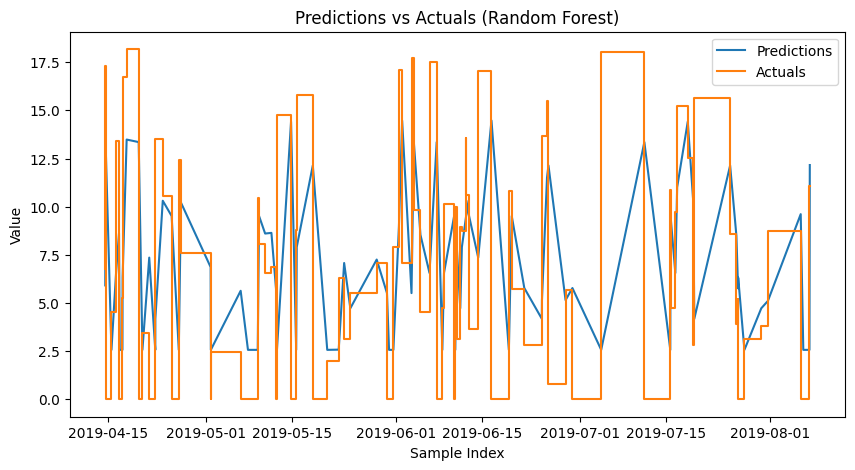

In [25]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(dates_pred, y_pred, label='Predictions')
plt.plot(y_test, label='Actuals')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title(f'Predictions vs Actuals ({params["model_name"]})')
plt.legend()
plt.show()

In [7]:
feature_importance = rf_model.feature_importances_
feature_names = data.feature_names

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.gca().invert_yaxis()
plt.show()

NameError: name 'data' is not defined